<a href="https://colab.research.google.com/github/gustianh/learn-textmining/blob/main/Lexicon_Based_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lexicon Based Sentiment Analysis of Bill Gates**

In [ ]:
!pip install Tweepy
!pip install TextBlob

In [ ]:
# Mengimpor pustaka yang akan digunakan
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('vader_lexicon')
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Authentication
consumerKey = "oZUXgzy1TCxQJJ7WfUVUqqQKV"
consumerSecret = "QCEKrwDBccqCFSIG4gtFFjy6jLPj7c2rsc78syakJ93wSjpobF"
accessToken = "1296634252688121856-0oVAX6XWXrW6M4XH28v6SUDD0UMRsY"
accessTokenSecret = "tRQMYZZlLljpVYt2Qn8pjml2nfOAHHYG3XefRIbGJmpTu"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
positive_list = []
negative_list = []

keyword = '#BillGates'
no_of_tweet = 1000
tweets = tweepy.Cursor(api.search, q=keyword).items(no_of_tweet)

for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity

  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

In [ ]:
def percentage(part,whole):
  return 100 * float(part) / float(whole)

In [ ]:
positive = percentage(positive, no_of_tweet)
negative = percentage(negative, no_of_tweet)
neutral = percentage(neutral, no_of_tweet)
polarity = percentage(polarity, no_of_tweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  219
negative number:  188
neutral number:  593


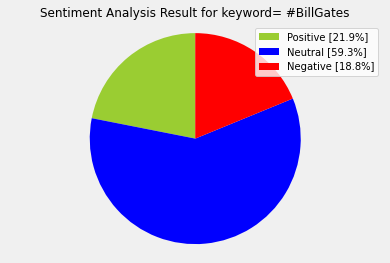

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

# **Reference**
**Yalin,Y**. 2020. *Step by Step: Twitter Sentiment Analysis in Python*. https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d